<a href="https://colab.research.google.com/github/Marcelooyola/Modulo6/blob/main/trabajo_final_mod6_oyola_marcelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 6 - Aprendizaje Automático - Machine Learning - Clasificación**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)

##Alumno: Oyola Marcelo

**En virtud del DataFrame propuesto, generar modelos de clasificación para predecir la contratación de depositos a plazo:**

- **age:** edad del cliente, valor numérico entero mayor a 18.
- **job:** trabajo del cliente.
- **marital:** estado civil del cliente.
- **education:** educación alcanzada por el cliente.
- **default:** si el cliente posee deudas.
- **balance:** depósito del cliente en euros.
- **housing:** propietario de inmueble o alquila.
- **loan:** si el cliente tiene un préstamo.
- **contact:** último contacto del cliente.
- **day:** día del último contacto del cliente.
- **month:** mes del último contacto el cliente.
- **duration:** duración del último contacto del cliente.
- **campaign:** identificación de la campaña.
- **pdays:** dias posteriores a la campaña.
- **previous:** números de contactos previos a la campaña.
- **poutcome:** resultados de la campaña anterior.
- **y:** si suscribe un depósito a plazo posterior a campaña.

# **Carga de módulos y datos necesarios**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # codificar variables categoricas
from sklearn.preprocessing import StandardScaler # estandarizar variables numericas
from sklearn.model_selection import train_test_split

In [3]:
#regresion logistica
from sklearn.linear_model import LogisticRegression
#arbol de regresion
from sklearn.ensemble import RandomForestClassifier

#necesario para los graficos y clasificaciones
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc


# **Creación del DataFrame**

In [4]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"
archivo="bank-full.csv"
clasificacion = pd.read_csv(url+archivo)

In [5]:
clasificacion.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [6]:
clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
clasificacion.isna().sum().sort_values(ascending = False)

poutcome     36959
contact      13020
education     1857
job            288
month            0
previous         0
pdays            0
campaign         0
duration         0
age              0
day              0
loan             0
housing          0
balance          0
default          0
marital          0
y                0
dtype: int64

In [8]:
#Funcion para ver mejor el contenido de cada columna

for i in clasificacion.columns:
  print("------"*10)
  print("Datos de Columna: "+ i)
  print(clasificacion[i].unique())
  print("Cantidad de datos nulos: "+ str(clasificacion[i].isna().sum()))
  print("Cantidad total de datos: "+ str((clasificacion[i].count() + clasificacion[i].isna().sum())))

------------------------------------------------------------
Datos de Columna: age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Cantidad de datos nulos: 0
Cantidad total de datos: 45211
------------------------------------------------------------
Datos de Columna: job
['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Cantidad de datos nulos: 288
Cantidad total de datos: 45211
------------------------------------------------------------
Datos de Columna: marital
['married' 'single' 'divorced']
Cantidad de datos nulos: 0
Cantidad total de datos: 45211
------------------------------------------------------------
Datos de Columna: education
['tertiary' 'secondary' nan 'primary']
Cantidad de datos nulos: 1857
Ca

##Variables categoricas y numericas

In [9]:
#numericas
cols_numericas = list(clasificacion.select_dtypes(exclude=["object"]))
cols_numericas

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [10]:
#categoricas
cols_categoricas = list(clasificacion.select_dtypes(include=["object"]))
cols_categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

##Imputaciones

poutcome     36959
contact      13020
education     1857
job            288

In [11]:
clasificacion.poutcome

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
45206        NaN
45207        NaN
45208    success
45209        NaN
45210      other
Name: poutcome, Length: 45211, dtype: object

In [12]:
imputacion = SimpleImputer(strategy = 'most_frequent')
cols_imputar = ['poutcome', 'contact', 'education','job']

for i in cols_imputar:
  clasificacion[i] = imputacion.fit_transform(clasificacion[['poutcome']])

#clasificacion.poutcome = imputacion.fit_transform(clasificacion[['poutcome']])
#clasificacion.poutcome

In [13]:
clasificacion

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,failure,married,failure,no,2143,yes,no,failure,5,may,261,1,-1,0,failure,no
1,44,failure,single,failure,no,29,yes,no,failure,5,may,151,1,-1,0,failure,no
2,33,failure,married,failure,no,2,yes,yes,failure,5,may,76,1,-1,0,failure,no
3,47,failure,married,failure,no,1506,yes,no,failure,5,may,92,1,-1,0,failure,no
4,33,failure,single,failure,no,1,no,no,failure,5,may,198,1,-1,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,failure,married,failure,no,825,no,no,failure,17,nov,977,3,-1,0,failure,yes
45207,71,failure,divorced,failure,no,1729,no,no,failure,17,nov,456,2,-1,0,failure,yes
45208,72,success,married,success,no,5715,no,no,success,17,nov,1127,5,184,3,success,yes
45209,57,failure,married,failure,no,668,no,no,failure,17,nov,508,4,-1,0,failure,no


In [14]:
clasificacion.isnull().sum().sort_values(ascending = False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

##Codificar variables categoricas

In [15]:
clasificacion.select_dtypes(include=["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,failure,married,failure,no,yes,no,failure,may,failure,no
1,failure,single,failure,no,yes,no,failure,may,failure,no
2,failure,married,failure,no,yes,yes,failure,may,failure,no
3,failure,married,failure,no,yes,no,failure,may,failure,no
4,failure,single,failure,no,no,no,failure,may,failure,no
...,...,...,...,...,...,...,...,...,...,...
45206,failure,married,failure,no,no,no,failure,nov,failure,yes
45207,failure,divorced,failure,no,no,no,failure,nov,failure,yes
45208,success,married,success,no,no,no,success,nov,success,yes
45209,failure,married,failure,no,no,no,failure,nov,failure,no


In [16]:
clasificacion[cols_categoricas] = clasificacion[cols_categoricas].apply(LabelEncoder().fit_transform)

In [17]:
clasificacion.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,0,0,2143,1,0,0,5,8,261,1,-1,0,0,0
1,44,0,2,0,0,29,1,0,0,5,8,151,1,-1,0,0,0
2,33,0,1,0,0,2,1,1,0,5,8,76,1,-1,0,0,0
3,47,0,1,0,0,1506,1,0,0,5,8,92,1,-1,0,0,0
4,33,0,2,0,0,1,0,0,0,5,8,198,1,-1,0,0,0


## Estandarizar variables numericas

In [18]:
clasificacion[cols_numericas].head(5)

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [19]:
scaler = StandardScaler()

In [20]:
clasificacion[cols_numericas] = scaler.fit_transform(clasificacion[cols_numericas])

In [21]:
clasificacion[cols_numericas].sample(5)

,age,balance,day,duration,campaign,pdays,previous
35245,-0.653211,-0.459900,-1.058161,-0.816088,-0.569351,-0.411453,-0.25194
23738,-0.464863,-0.145915,1.465155,-0.777257,1.690181,-0.411453,-0.25194
4583,-0.841558,3.394298,0.503892,0.146925,-0.569351,-0.411453,-0.25194
24808,-0.747384,0.089902,0.263576,-0.761725,-0.569351,-0.411453,-0.25194
5372,0.194355,-0.331481,0.864365,-0.408361,-0.569351,-0.411453,-0.25194


## Preparar el dataset

In [22]:
X = clasificacion.drop(labels = ['y'],axis = 1)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,0,1,0,0,0.256419,1,0,0,-1.298476,8,0.011016,-0.569351,-0.411453,-0.251940,0
1,0.288529,0,2,0,0,-0.437895,1,0,0,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.251940,0
2,-0.747384,0,1,0,0,-0.446762,1,1,0,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.251940,0
3,0.571051,0,1,0,0,0.047205,1,0,0,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.251940,0
4,-0.747384,0,2,0,0,-0.447091,0,0,0,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.251940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,0,1,0,0,-0.176460,0,0,0,0.143418,9,2.791329,0.076230,-0.411453,-0.251940,0
45207,2.831227,0,0,0,0,0.120447,0,0,0,0.143418,9,0.768224,-0.246560,-0.411453,-0.251940,0
45208,2.925401,2,1,2,0,1.429593,0,0,2,0.143418,9,3.373797,0.721811,1.436189,1.050473,2
45209,1.512791,0,1,0,0,-0.228024,0,0,0,0.143418,9,0.970146,0.399020,-0.411453,-0.251940,0


In [23]:
y = clasificacion['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 123)

# **Generación del primer modelo de clasificación**

In [25]:
#crear y entrenar modelo
modelo_regresion = LogisticRegression()
modelo_regresion.fit(X_train, y_train)

LogisticRegression()

In [26]:
#hacer prediccion sobre conjunto de pruebas
y_prediccion = modelo_regresion.predict(X_test)

In [27]:
#Evaluar modelo
accuracy = accuracy_score(y_test, y_prediccion)
reporte_clasificacion = classification_report(y_test, y_prediccion)

print(f"Precision: {accuracy}")
print(f"Reporte de clasificacion: \n {reporte_clasificacion}")

Precision: 0.8980389265703332
Reporte de clasificacion: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11998
           1       0.62      0.30      0.41      1566

    accuracy                           0.90     13564
   macro avg       0.77      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



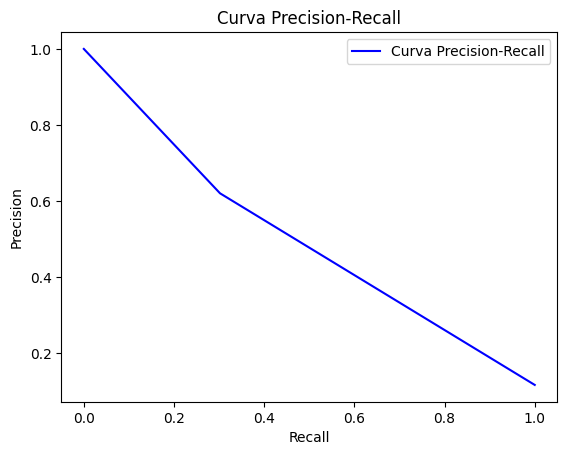

In [28]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prediccion)

# Graficar la curva precision-recall
plt.plot(recall, precision, label='Curva Precision-Recall', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='best')
plt.show()


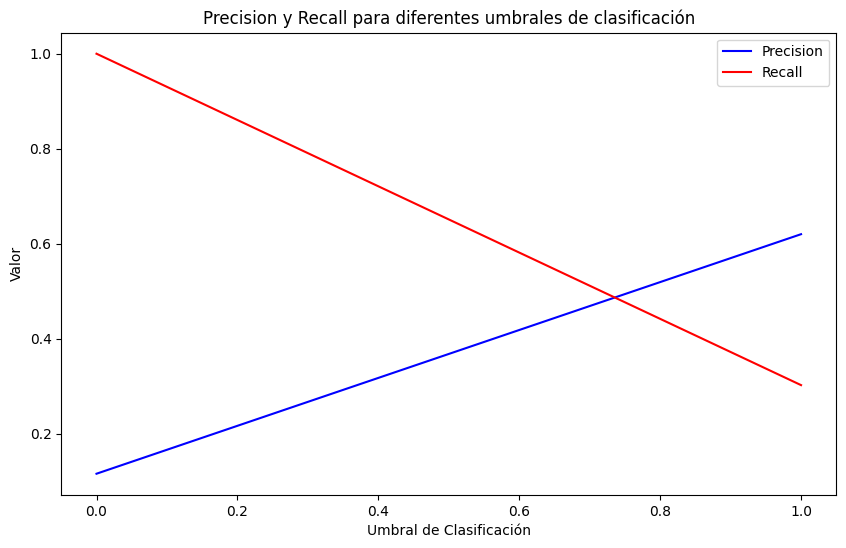

In [29]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prediccion)
area = auc(recall, precision)

# Graficar barras para precision y recall en diferentes umbrales
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='r')
plt.xlabel('Umbral de Clasificación')
plt.ylabel('Valor')
plt.legend(loc='best')
plt.title('Precision y Recall para diferentes umbrales de clasificación')
plt.show()


# **Generación del segundo modelo de clasificación**

In [30]:
modelo_arbol = RandomForestClassifier()
modelo_arbol.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_prediccion = modelo_arbol.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_prediccion)
reporte_clasificacion  = classification_report(y_test, y_prediccion)

print(f"Precision: {accuracy}")
print(f"Reporte de clasificacion: \n {reporte_clasificacion}")

Precision: 0.903420819817163
Reporte de clasificacion: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11998
           1       0.63      0.40      0.49      1566

    accuracy                           0.90     13564
   macro avg       0.78      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564



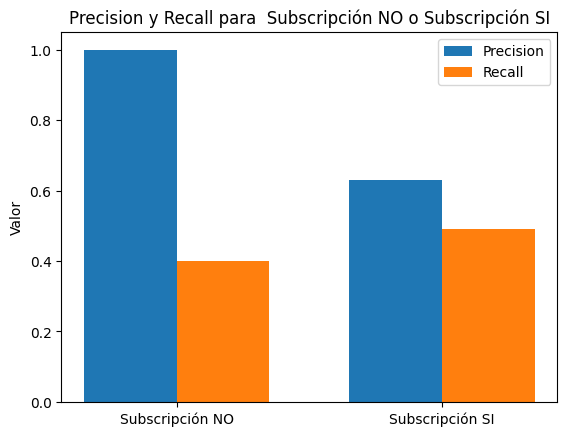

In [33]:
# Generar el reporte de clasificación
reporte_clasificacion = classification_report(y_test, y_prediccion, target_names=["Subscripción 0", "Subscripción 1"])

# Extraer precision y recall del reporte de clasificación
precision = [float(p) for p in reporte_clasificacion.split('\n')[3].split()[1:3]]
recall = [float(r) for r in reporte_clasificacion.split('\n')[3].split()[3:5]]

# Crear un gráfico de barras
clases = np.arange(len(precision))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(clases - width/2, precision, width, label='Precision')
bar2 = ax.bar(clases + width/2, recall, width, label='Recall')

# Etiquetas y título
ax.set_ylabel('Valor')
ax.set_title('Precision y Recall para  Subscripción NO o Subscripción SI')
ax.set_xticks(clases)
ax.set_xticklabels(["Subscripción NO", "Subscripción SI"])
ax.legend()

# Mostrar el gráfico
plt.show()


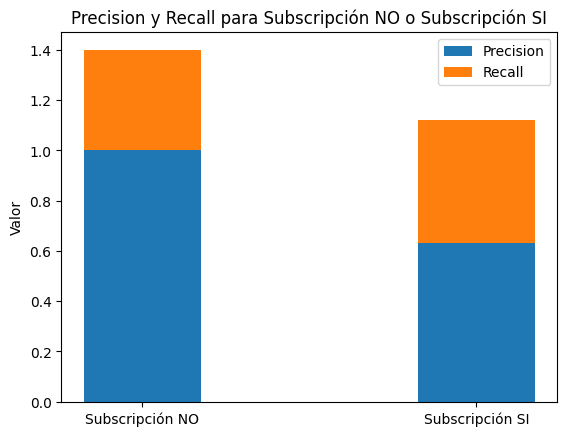

In [34]:
# Generar el reporte de clasificación
reporte_clasificacion = classification_report(y_test, y_prediccion, target_names=["Subscripción 0", "Subscripción 1"])

# Extraer precision y recall del reporte de clasificación
precision = [float(p) for p in reporte_clasificacion.split('\n')[3].split()[1:3]]
recall = [float(r) for r in reporte_clasificacion.split('\n')[3].split()[3:5]]

# Crear un gráfico de barras apiladas
clases = np.arange(len(precision))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(clases, precision, width, label='Precision')
bar2 = ax.bar(clases, recall, width, label='Recall', bottom=precision)

# Etiquetas y título
ax.set_ylabel('Valor')
ax.set_title('Precision y Recall para Subscripción NO o Subscripción SI')
ax.set_xticks(clases)
ax.set_xticklabels(["Subscripción NO", "Subscripción SI"])
ax.legend()

# Mostrar el gráfico
plt.show()


# **Conclusiones**

###Modelo A (Regresion Logistica):

1. **Precision**:
   - Para la clase 0: 0.91. Esto significa que de todas las predicciones que el modelo etiquetó como clase 0, el 93% de ellas eran realmente de la clase 0.
   - Para la clase 1: 0.62. Esto significa que de todas las predicciones que el modelo etiquetó como clase 1, el 62% de ellas eran realmente de la clase 1.

2. **Recall**:
   - Para la clase 0: 0.98. Esto significa que el 97% de las muestras reales de la clase 0 fueron identificadas correctamente por el modelo.
   - Para la clase 1: 0.30. Esto significa que solo el 41% de las muestras reales de la clase 1 fueron identificadas correctamente por el modelo.

3. **F1-Score**:
   - Para la clase 0: 0.94. El F1-score es la media armónica de la precisión y el recall, lo que proporciona una medida equilibrada entre ambas métricas. Un valor alto indica un buen equilibrio entre precision y recall.
   - Para la clase 1: 0.41. El F1-score de la clase 1 es relativamente bajo, lo que indica que el modelo tiene dificultades para clasificar correctamente las muestras de esta clase.

4. **Accuracy**:
   - 0.90. La precisión global del modelo en el conjunto de prueba.

Este modelo para la Clase 0 muestra muy buena predicción, acertando en un numero muy convincente.

Mientras que para la Clase 1 presenta serias dificultades y no se puede garantizar que haga buena prediccion para los datos de esta clase.

###Modelo B (Random Forest):

1. **Precision**:
   - Para la clase 0: 0.93. Esto significa que de todas las predicciones que el modelo etiquetó como clase 0, el 93% de ellas eran realmente de la clase 0.
   - Para la clase 1: 0.63. Esto significa que de todas las predicciones que el modelo etiquetó como clase 1, el 62% de ellas eran realmente de la clase 1.

2. **Recall**:
   - Para la clase 0: 0.97. Esto significa que el 97% de las muestras reales de la clase 0 fueron identificadas correctamente por el modelo.
   - Para la clase 1: 0.40. Esto significa que solo el 41% de las muestras reales de la clase 1 fueron identificadas correctamente por el modelo.

3. **F1-Score**:
   - Para la clase 0: 0.95. El F1-score es la media armónica de la precisión y el recall, lo que proporciona una medida equilibrada entre ambas métricas. Un valor alto indica un buen equilibrio entre precision y recall.
   - Para la clase 1: 0.49. El F1-score de la clase 1 es relativamente bajo, lo que indica que el modelo tiene dificultades para clasificar correctamente las muestras de esta clase.

4. **Accuracy**:
   - 0.90. La precisión global del modelo en el conjunto de prueba.

Al igual que el modelo anterior, existe una precisión muy buena en la clase 0, pero tiene multiples dificultades para clasificar correctamente la clase 1, donde sus valores se acercan mas a un modelo aleatorio que a uno que realmente pueda predecir bien.

###En definitiva:

El modelo B presenta mejores numeros a la hora de hacer dicha clasificacion de datos.

Dicho modelo tiene una mejor prediccion para los casos positivos, lo que es crucial para poder identificar potenciales clientes y realizar campañas de marketing mas precisas.

De cualquier manera la diferencia en la exactitud entre ambos modelos es baja, por lo se podría usar el Modelo A sin tener mayores variaciones.

